In [59]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Création du signal

on cherche à modéliser un carré pour ce la on va prendre 100 points

### 1.1 Carré

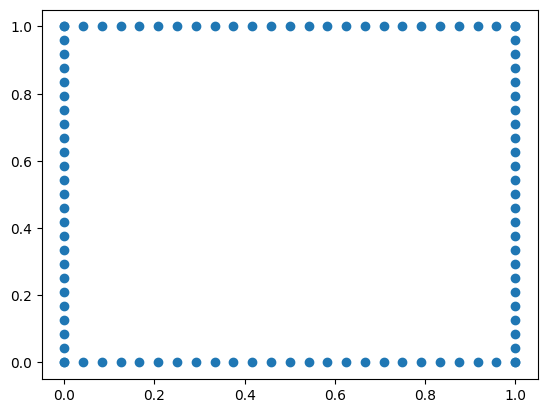

In [98]:
def carré(n,long):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    for i in x:
        X.append(i)
        Y.append(0)
    for j in x:
        X.append(long)
        Y.append(j)
    for i in x[::-1]:
        X.append(i)
        Y.append(long)
    for j in x[::-1]:
        X.append(0)
        Y.append(j)
    return X,Y


X,Y=carré(100,1)

plt.scatter(X,Y)


### 1.2 Passage en complexe

In [99]:
def complexification(X,Y):
    L=[]
    for x in range(len(X)):
        L.append(X[x]+1j*Y[x])
    return L

L=complexification(X,Y)

print(L)

[0j, (0.041666666666666664+0j), (0.08333333333333333+0j), (0.125+0j), (0.16666666666666666+0j), (0.20833333333333331+0j), (0.25+0j), (0.29166666666666663+0j), (0.3333333333333333+0j), (0.375+0j), (0.41666666666666663+0j), (0.4583333333333333+0j), (0.5+0j), (0.5416666666666666+0j), (0.5833333333333333+0j), (0.625+0j), (0.6666666666666666+0j), (0.7083333333333333+0j), (0.75+0j), (0.7916666666666666+0j), (0.8333333333333333+0j), (0.875+0j), (0.9166666666666666+0j), (0.9583333333333333+0j), (1+0j), (1+0j), (1+0.041666666666666664j), (1+0.08333333333333333j), (1+0.125j), (1+0.16666666666666666j), (1+0.20833333333333331j), (1+0.25j), (1+0.29166666666666663j), (1+0.3333333333333333j), (1+0.375j), (1+0.41666666666666663j), (1+0.4583333333333333j), (1+0.5j), (1+0.5416666666666666j), (1+0.5833333333333333j), (1+0.625j), (1+0.6666666666666666j), (1+0.7083333333333333j), (1+0.75j), (1+0.7916666666666666j), (1+0.8333333333333333j), (1+0.875j), (1+0.9166666666666666j), (1+0.9583333333333333j), (1+1j

### 1.3 Transformation signal

## 2. Décomposition de fourrier

In [100]:
import math

def fourrier_decompo(Liste_complexes,f):
    n=len(Liste_complexes)
    
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for x in range(n)]]
    L=np.array(Liste_complexes)
    return np.sum(vect_exp*L.T)

list_fourrier=[fourrier_decompo(L,x) for x in range(len(L))]



### 3. $TF^{-1}$

In [101]:
def tf_1(coeff_fourriers,k,x):
    n=len(coeff_fourriers)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for f in range(k)]]
    L=np.array(coeff_fourriers[0:k])
    return 1/n*np.sum(vect_exp*L.T)
    
    



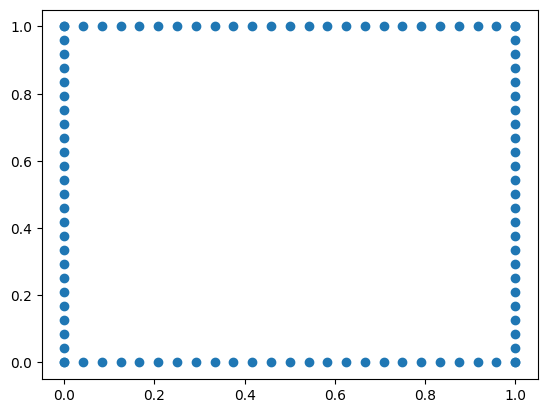

In [102]:
long=len(L)

s_reconstruit=[tf_1(list_fourrier,100,x) for x in range(long)]
X=[x.real for x in s_reconstruit]
Y=[y.imag for y in s_reconstruit]

plt.scatter(X,Y)

### Rotation

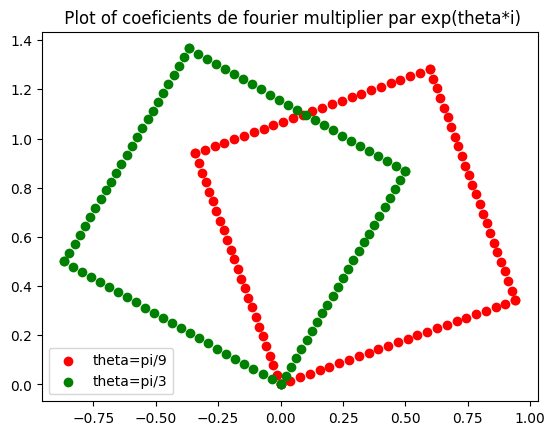

In [103]:
def rotation(list_fourrier):
    list_fourrier1 =[i*np.exp(np.pi*1j/9) for i in list_fourrier]
    list_fourrier2 =[i*np.exp(np.pi*1j/3) for i in list_fourrier]


    long=len(list_fourrier1)

    s_reconstruitr1=[tf_1(list_fourrier1,100,x) for x in range(long)]
    X1=[x.real for x in s_reconstruitr1]
    Y1=[y.imag for y in s_reconstruitr1]

    s_reconstruitr2=[tf_1(list_fourrier2,100,x) for x in range(long)]
    X2=[x.real for x in s_reconstruitr2]
    Y2=[y.imag for y in s_reconstruitr2]

    plt.scatter(X1,Y1, color='red', label='theta=pi/9')
    plt.scatter(X2,Y2, color='green', label='theta=pi/3')
    plt.title(" Plot of coeficients de fourier multiplier par exp(theta*i)")
    plt.legend()
    plt.show()

rotation(list_fourrier)

### Translation

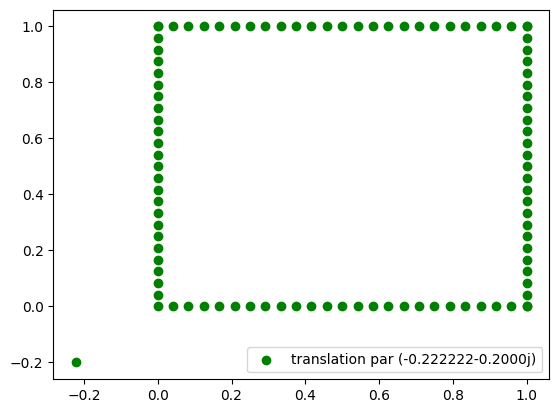

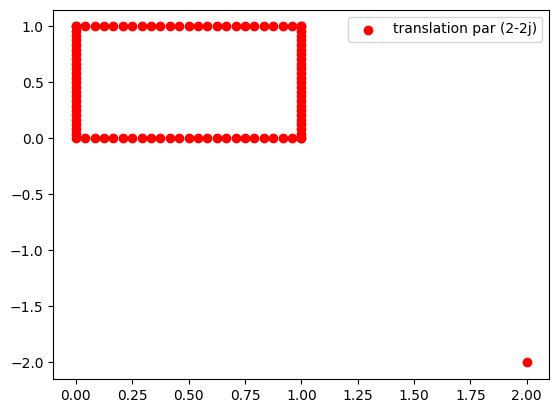

In [112]:
def translation(list_fourrier):
    
   

    list_fourrier1 =[i+(2-2j) for i in list_fourrier]
    list_fourrier2 =[k+ (-0.222222-0.2000j) for k in list_fourrier]


    long=len(list_fourrier1)

    s_reconstruitr1=[tf_1(list_fourrier1,100,x) for x in range(long)]
   
    X1=[x1.real for x1 in s_reconstruitr1]
    Y1=[y1.imag for y1 in s_reconstruitr1]

    s_reconstruitr2=[tf_1(list_fourrier2,100,x) for x in range(long)]
   
    X2=[x2.real for x2 in s_reconstruitr2]
    Y2=[y2.imag for y2 in s_reconstruitr2]

   
    plt.scatter(X2,Y2, color='green', label='translation par (-0.222222-0.2000j)')
    
    plt.legend()
    plt.show()

    plt.scatter(X1,Y1, color='red', label='translation par (2-2j)')
 
    plt.legend()
    plt.show()
translation(list_fourrier)

### Homothétie

In [113]:
def make_fourier_descriptors_invariant(coefficients):
    
    coefficients = coefficients[1:]  # Ignorer le premier coefficient (a_0)
    # Normalisation pour l'invariance en rotation
    c1=np.abs(coefficients[0])
    first_non_zero_coefficient = next((c for c in coefficients if np.abs(c) > 0), None)
    if first_non_zero_coefficient is not None:
        rotation_invariant_coefficients = coefficients / np.angle(first_non_zero_coefficient)
    # Normalisation pour l'invariance en homothétie
    scale_invariant_coefficients = rotation_invariant_coefficients / np.abs(first_non_zero_coefficient)


    return scale_invariant_coefficients 

homothétie= make_fourier_descriptors_invariant(list_fourrier)

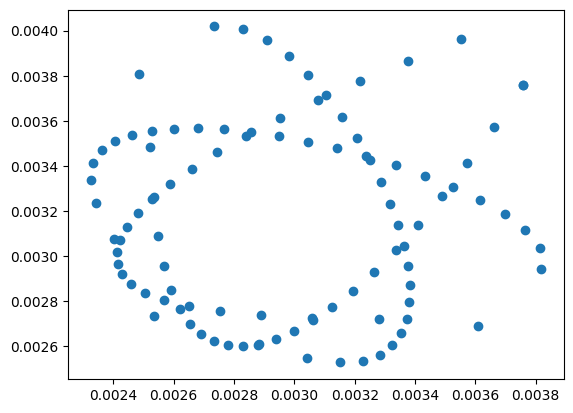

In [114]:
def homothétie_plot(list_fourrier):

    homothétie= make_fourier_descriptors_invariant(list_fourrier)
    long= len(L)
    s_reconstruit=[tf_1(homothétie,99,x) for x in range(long)]
    X=[x.real for x in s_reconstruit]
    Y=[y.imag for y in s_reconstruit]
    plt.scatter(X,Y)
homothétie_plot(list_fourrier)